In [424]:
import pandas as pd 
import numpy as py
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA

In [425]:
df = pd.read_csv('/Users/surajojha/Downloads/monthly-milk-production-pounds-p - monthly-milk-production-pounds-p.csv')

In [426]:
df.head()


,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [427]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,NaN,NaN
169,Monthly milk production: pounds per cow. Jan 6...,NaN


In [428]:
df.columns = ['Month', 'Milk in pounds per cow']

In [429]:
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [430]:
df.drop(168,axis = 0,inplace = True)

In [431]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

In [432]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
169          NaT
Name: Month, Length: 169, dtype: datetime64[ns]

In [433]:
df.set_index('Month',inplace=True)

In [434]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0


In [435]:
df.describe()

,Milk in pounds per cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [436]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-04-01', '1975-05-01', '1975-06-01', '1975-07-01',
               '1975-08-01', '1975-09-01', '1975-10-01', '1975-11-01',
               '1975-12-01',        'NaT'],
              dtype='datetime64[ns]', name='Month', length=169, freq=None)

<Axes: xlabel='Month'>

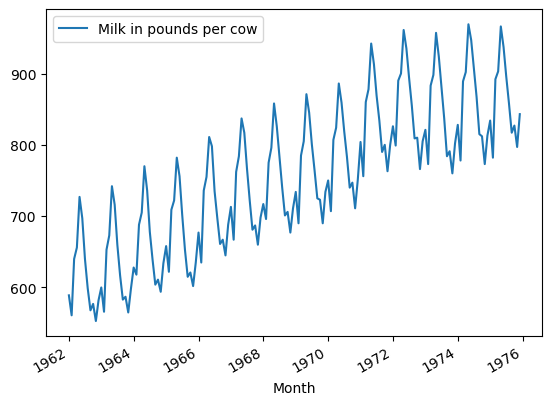

In [437]:
df.plot()

In [438]:
print(df.columns)

Index(['Milk in pounds per cow'], dtype='object')


In [439]:
timeseries = df['Milk in pounds per cow']

<Axes: xlabel='Month'>

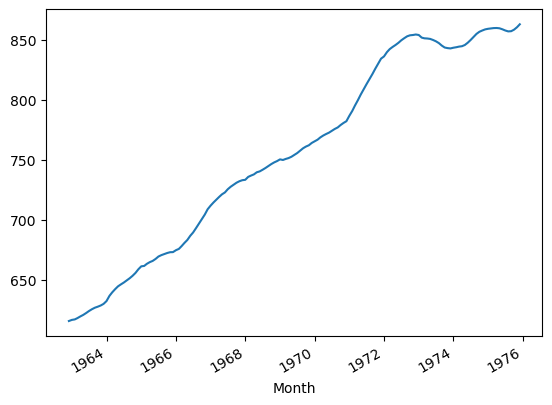

In [440]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

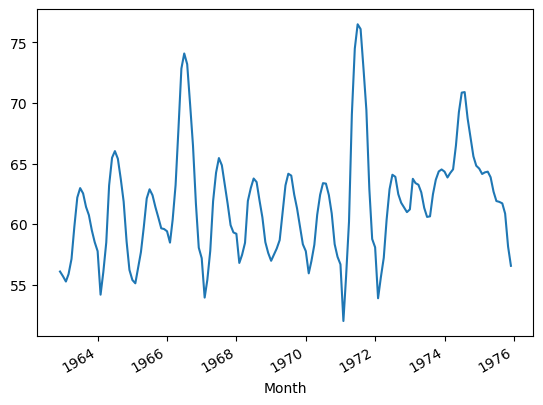

In [441]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

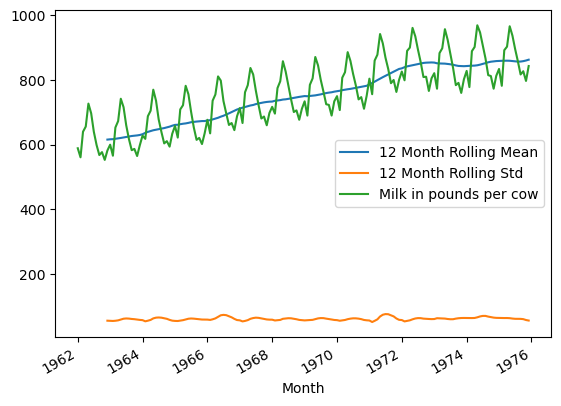

In [442]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

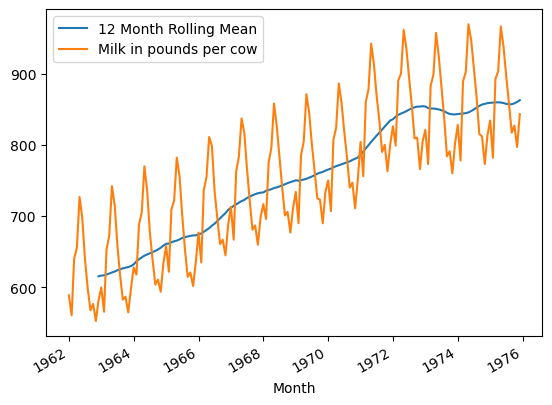

In [443]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

In [444]:
# Step 2: Handle missing values by filling them with the mean
df['Milk in pounds per cow'].fillna(df['Milk in pounds per cow'].mean(), inplace=True)

# Step 3: Perform seasonal decomposition
decomposition = seasonal_decompose(df['Milk in pounds per cow'], period=12)  


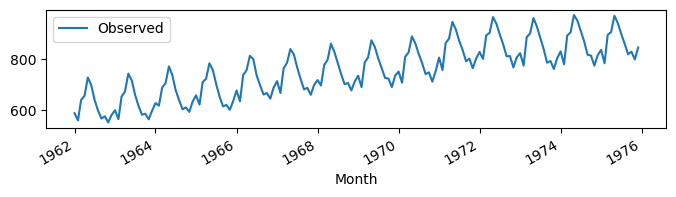

In [445]:
plt.figure(figsize=(8, 8))
plt.subplot(411)
decomposition.observed.dropna().plot(label='Observed')
plt.legend()


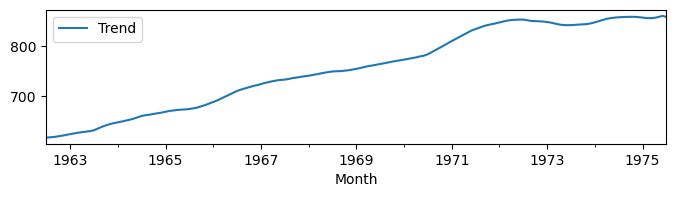

In [446]:
plt.figure(figsize=(8, 8))
plt.subplot(412)
decomposition.trend.dropna().plot(label='Trend')
plt.legend()

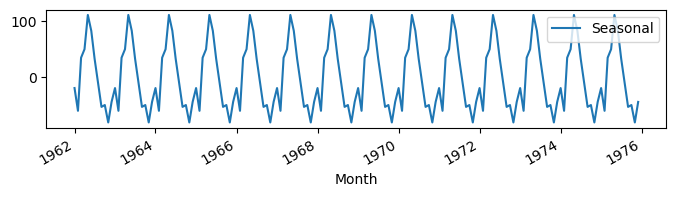

In [447]:
plt.figure(figsize=(8, 8))
plt.subplot(413)
decomposition.seasonal.dropna().plot(label='Seasonal')
plt.legend()

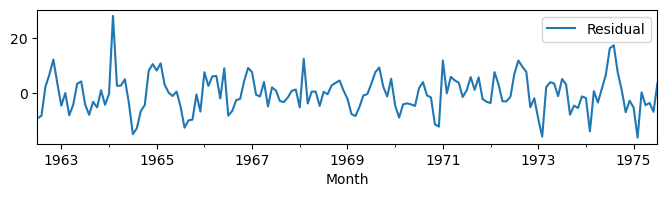

In [448]:
plt.figure(figsize=(8, 8))
plt.subplot(414)
decomposition.resid.dropna().plot(label='Residual')
plt.legend()
  

In [449]:
result = adfuller(df['Milk in pounds per cow'])

In [450]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [451]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [452]:
adf_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
adf_results = dict(zip(adf_labels, result))
for label, value in adf_results.items():
    print('{}: {}'.format(label, value))


ADF Test Statistic: -1.8547180497327416
p-value: 0.35365358248550843
#Lags Used: 12
Number of Observations Used: 156


In [453]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [454]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [455]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [456]:
df['Milk First Difference'] 

Month
1962-01-01          NaN
1962-02-01   -28.000000
1962-03-01    79.000000
1962-04-01    16.000000
1962-05-01    71.000000
                ...    
1975-09-01   -41.000000
1975-10-01    10.000000
1975-11-01   -30.000000
1975-12-01    46.000000
NaT          -88.291667
Name: Milk First Difference, Length: 169, dtype: float64

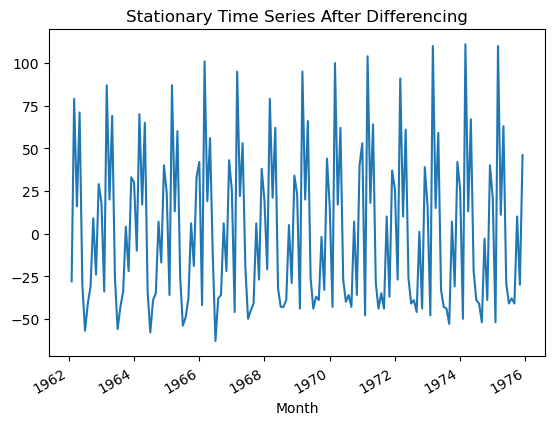

In [457]:
# Apply differencing to make the data stationary
df['Milk_diff'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)
df['Milk_diff'].dropna().plot()
plt.title('Stationary Time Series After Differencing')
plt.show()

In [458]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [459]:
df['Seasonal Difference']

Month
1962-01-01          NaN
1962-02-01          NaN
1962-03-01          NaN
1962-04-01          NaN
1962-05-01          NaN
                ...    
1975-09-01     2.000000
1975-10-01    15.000000
1975-11-01    24.000000
1975-12-01    30.000000
NaT          -79.291667
Name: Seasonal Difference, Length: 169, dtype: float64

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.351889375103977
p-value : 0.15577800453596724
#Lags Used : 1
Number of Observations Used : 155
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


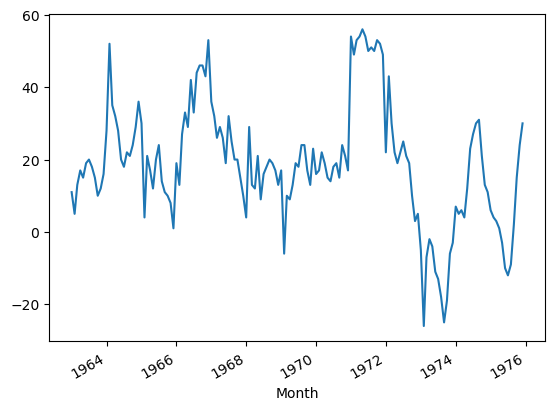

In [460]:
df['Seasonal Difference'].plot()
adf_check(df['Seasonal Difference'].dropna())

In [461]:
# Check for stationarity again
result_diff = adfuller(df['Milk_diff'].dropna())
adf_diff_results = dict(zip(adf_labels, result_diff))
for label, value in adf_diff_results.items():
    print('{} after differencing: {}'.format(label, value))


ADF Test Statistic after differencing: -2.308902742820635
p-value after differencing: 0.16911273469856575
#Lags Used after differencing: 12
Number of Observations Used after differencing: 155


# Now the p-value is less than 0.05, indicating stationarity.# 

In [462]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

<Axes: xlabel='Month'>

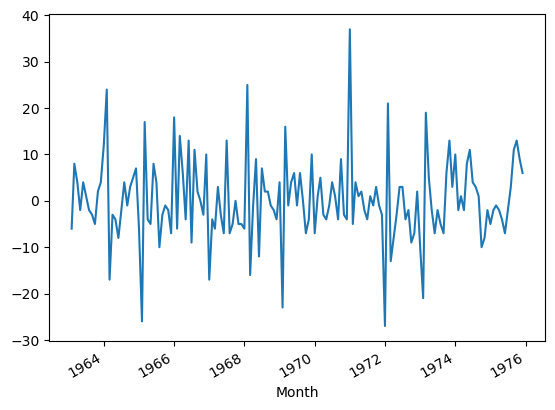

In [463]:
df['Seasonal First Difference'].plot()

In [464]:
df['Seasonal First Difference']

Month
1962-01-01           NaN
1962-02-01           NaN
1962-03-01           NaN
1962-04-01           NaN
1962-05-01           NaN
                 ...    
1975-09-01     11.000000
1975-10-01     13.000000
1975-11-01      9.000000
1975-12-01      6.000000
NaT          -109.291667
Name: Seasonal First Difference, Length: 169, dtype: float64

In [465]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -11.364918260814475
p-value : 9.277340225221406e-21
#Lags Used : 0
Number of Observations Used : 155
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [466]:
df['Seasonal First Difference']

Month
1962-01-01           NaN
1962-02-01           NaN
1962-03-01           NaN
1962-04-01           NaN
1962-05-01           NaN
                 ...    
1975-09-01     11.000000
1975-10-01     13.000000
1975-11-01      9.000000
1975-12-01      6.000000
NaT          -109.291667
Name: Seasonal First Difference, Length: 169, dtype: float64

<Axes: xlabel='Month'>

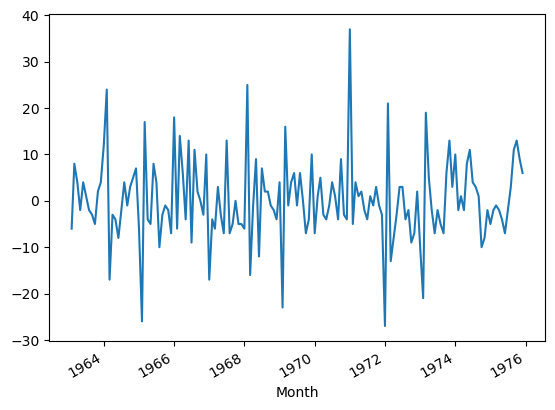

In [467]:
df['Seasonal First Difference'].plot()

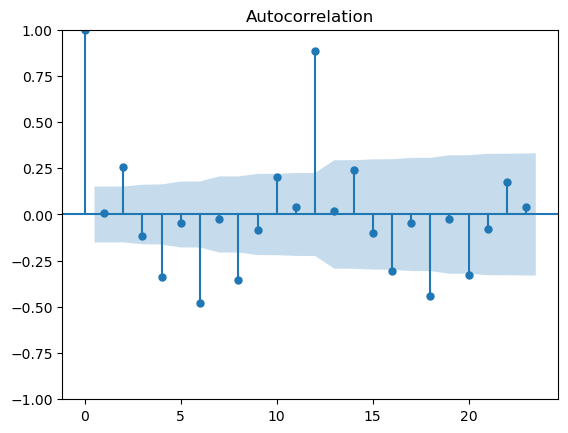

In [468]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [469]:
k=df["Milk First Difference"].dropna()
k

Month
1962-02-01   -28.000000
1962-03-01    79.000000
1962-04-01    16.000000
1962-05-01    71.000000
1962-06-01   -30.000000
                ...    
1975-09-01   -41.000000
1975-10-01    10.000000
1975-11-01   -30.000000
1975-12-01    46.000000
NaT          -88.291667
Name: Milk First Difference, Length: 168, dtype: float64

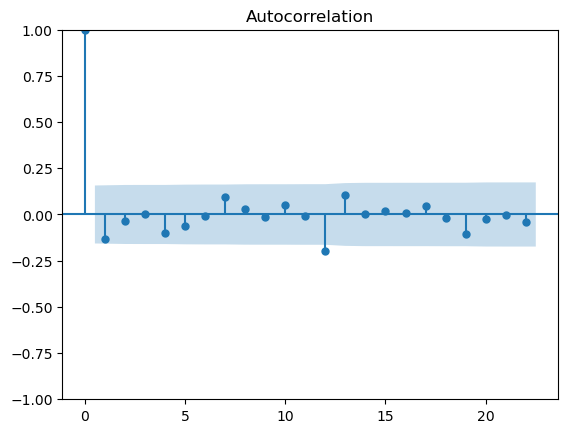

In [470]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

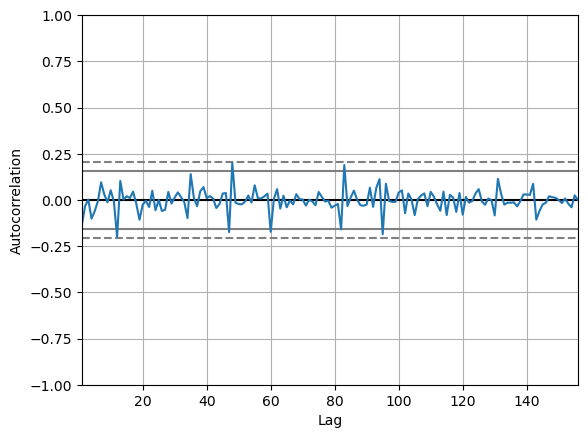

In [471]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

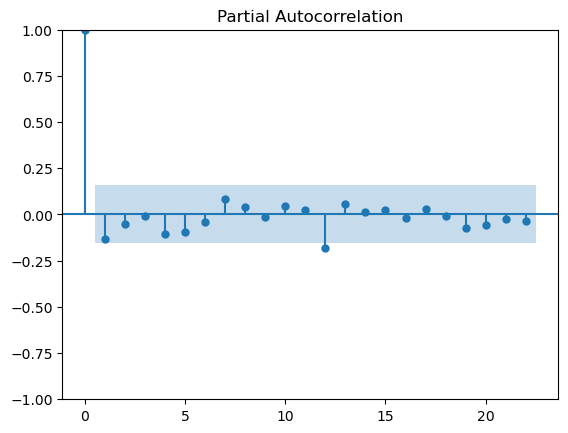

In [472]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

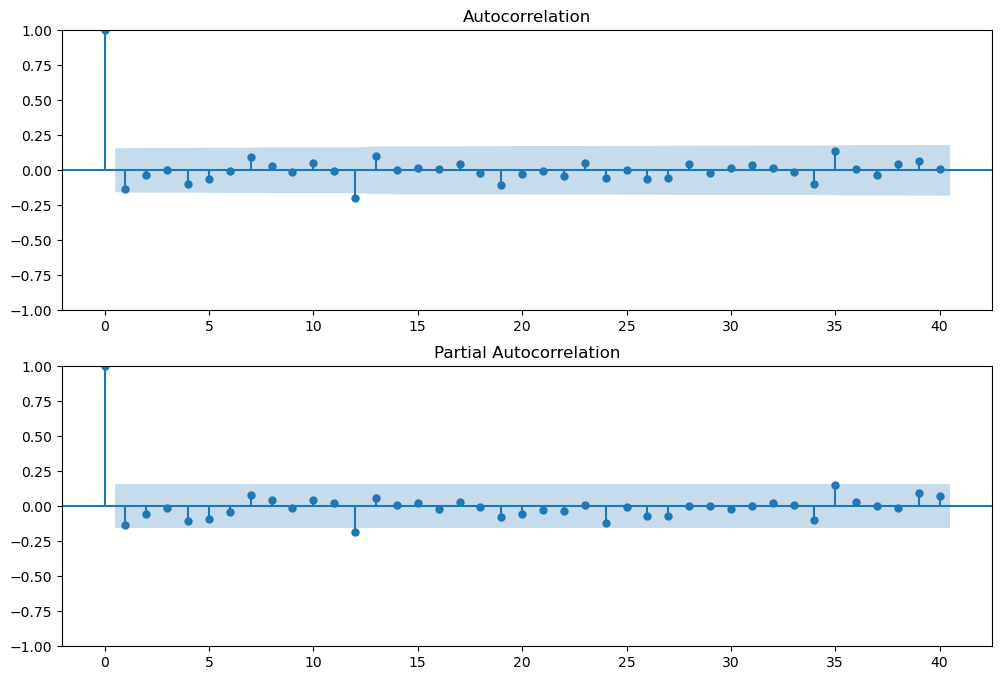

In [473]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax = ax2)

In [507]:
# Build ARIMA model with seasonal order
model = ARIMA(df['Milk in pounds per cow'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
result_arima = model.fit()
print(result_arima.summary())


                                     SARIMAX Results                                      
Dep. Variable:             Milk in pounds per cow   No. Observations:                  169
Model:             ARIMA(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -606.389
Date:                            Wed, 17 Apr 2024   AIC                           1218.777
Time:                                    12:03:10   BIC                           1227.927
Sample:                                         0   HQIC                          1222.493
                                            - 169                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0329      0.277     -0.119      0.905      -0.575       0.509
ma.S.L12      -0.4767      0.272   

/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

In [503]:
df.drop('Milk_diff', axis=1, inplace=True)

In [504]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-09-01,817.000000,-41.000000,2.000000,11.000000,830.022041
1975-10-01,827.000000,10.000000,15.000000,13.000000,835.553875
1975-11-01,797.000000,-30.000000,24.000000,9.000000,800.225979
1975-12-01,843.000000,46.000000,30.000000,6.000000,840.626579
NaT,754.708333,-88.291667,-79.291667,-109.291667,865.284498


In [508]:
# Predict future milk production
forecast = result_arima.forecast(steps=3)  # Change the steps value as needed
print('Forecast:', forecast)

Forecast: 169    705.685602
170    814.247463
171    826.628804
Name: predicted_mean, dtype: float64


/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/surajojha/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
